In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

In [14]:
data = np.genfromtxt('MultiVarLR - MultiVarLR.csv',delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [3]:
x = np.array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [12]:
thetas = (np.zeros(data.shape[1]).reshape(1,4)).T
thetas

array([[0.],
       [0.],
       [0.],
       [0.]])

In [14]:
x = data[:,:-1]
#x=np.concatenate((np.ones(data.shape[0])[:,np.newaxis],x),axis=1)
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [22]:
thetas=np.zeros(x.shape[1]).reshape(3,1)

In [26]:
m = len(x)
m

25

In [13]:
y=data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [11]:
y[5:-1]

array([101., 149., 115., 175., 164., 141., 141., 184., 152., 148., 192.,
       147., 183., 177., 159., 177., 175., 175., 149.])

In [6]:
25//5 , 23/5,23%5,25%5

(5, 4.6, 3, 0)

In [30]:
def Adam (data,lr,E,it,B1,B2,size):
    
    mt_=np.array([0])
    vt_=np.array([0])
    th=np.zeros(data.shape[1]).reshape(-1,1)
    costs=[]
   # h_yhat=[]
    
    x = data[:,:-1]
    x=np.concatenate((np.ones(data.shape[0])[:,np.newaxis],x),axis=1)
    
    thetas = [np.zeros(data.shape[1]).reshape(-1,1)]
    y=data[:,-1].reshape(-1,1)
    m = len(x)
    
    shuffle = np.random.permutation(m)
    x = x[shuffle]
    y = y[shuffle]
    
    for j in range (it):
        print(f'****************** Epoch {j+1} ********************\n')
        
        bat =  (len(x))//size 
        
        if   (len(x))%size ==0 :
            batch =  (len(x))//size 
        else :
            batch =  ((len(x))//size )+1
        
        for i in range (batch):
            print(f'****************** Batch {i+1} ********************\n')

            if i == (bat):
                start=i*size
                end=len(x)
            else :
                start=i*size
                end=(i+1)*size
                
            h_yhat=(x[start:end]@th) # calculate y predict (y hat)
            
  #          print (f'h(x):{h_yhat}\n')

            errs=( h_yhat-y [start:end])# sub y pre from y orginal
     #       print(f'Error Vector:{errs}\n') 
            
            cost = errs.T@errs/(size*2)
 
#           print(f'j(mse):{costs[i]}\n')

            gradient_vec=(x[start:end].T@errs)/size # j/th1 

   #         print(f'Gradient Vector:\n{gradient_vec}\n')

            gradient_vector_norm=np.linalg.norm(gradient_vec)
 #           print(f'Gradient Vector Norm:{gradient_vector_norm}\n') 
                  
            mt_=(B1*mt_)+((1-B1)*gradient_vec)
            mt_h=mt_/(1-(B1)**(i+1))

            vt_ = B2*vt_ + (1-B2)*(gradient_vec**2)  
            vt_h=vt_/(1-(B2)**(i+1))

            th=th -((lr/(np.sqrt(vt_h)+E))*mt_h)

        print(f'cost:{cost}\n')
        print(f'Gradient Vector:{gradient_vec}\n')
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n')
        print(f'M_{i}:{mt_}\n')    
        print(f'M_{i}_corrected:{mt_h} \n')  
        print(f'Vt_{i}:{vt_}\n')
        print(f'Vt_{i}_corrected:{vt_h} \n')
        print(f'theta_new :{th} \n')    
        
        costs.append(cost) # j or loss or cost with MSE 
                  
        if (gradient_vector_norm<0.001  ):
                print('norm')
                break


        if j!=0 and abs(costs[j]-costs[j-1])< 0.001 :
                print('cost')
                break
        

        if j!= (it-1) :
                thetas.append(th) #update eq with nag
                h_yhat=x@th
    
    if j != it-1:        #do not print if iter finshed
            h_yhat=x@th
            print(f'\n\nGradient Descent converged after {j+1} epochs\n')
            print ((f'thetas_Opt :{thetas[-1]} \n'))
            print(f'Error Vector:{errs}\n')
            print(f'Cost :{costs[-1]}\n')
            print(f'h(x) = y_predict:{h_yhat}')
            print(f'y_actual:{y}')
      #      print(f'cost_len:{len(costs)},th_len:{len(thetas)}')
            print(f'Accurcey:{r2_score(y,h_yhat)}')
    
    return thetas,costs,h_yhat,lr



In [32]:
thetas,costs,h_yhat,lr= Adam(data,0.01,1e-08,1000,0.9,0.999,5)

****************** Epoch 1 ********************

****************** Batch 1 ********************

****************** Batch 2 ********************

****************** Batch 3 ********************

****************** Batch 4 ********************

****************** Batch 5 ********************

cost:[[12235.44885717]]

Gradient Vector:[[  -155.83381259]
 [-12704.9705178 ]
 [-12699.67960907]
 [-13052.4357544 ]]

Gradient Vector Norm:22205.59617148314

M_4:[[  -64.02488567]
 [-5153.0452679 ]
 [-5182.35082446]
 [-5306.16577249]]

M_4_corrected:[[  -156.34510921]
 [-12583.44184001]
 [-12655.00433313]
 [-12957.35335521]] 

Vt_4:[[1.23883788e+02]
 [8.11724958e+05]
 [8.19753122e+05]
 [8.61816243e+05]]

Vt_4_corrected:[[2.48263606e+04]
 [1.62670006e+08]
 [1.64278854e+08]
 [1.72708320e+08]] 

theta_new :[[0.04974599]
 [0.04956036]
 [0.04963626]
 [0.04950233]] 

****************** Epoch 2 ********************

****************** Batch 1 ********************

****************** Batch 2 ************

In [32]:
h_yhat1,y

(array([[178.11047815],
        [149.18370195],
        [187.49981344],
        [148.53441001],
        [159.94782038],
        [141.1221865 ],
        [188.17251859],
        [173.38727611],
        [172.71184781],
        [198.2582118 ],
        [141.13008216],
        [104.16520372],
        [166.00619036],
        [153.90700666],
        [155.24486353],
        [143.15126299],
        [179.43788732],
        [110.23677877],
        [156.58292573],
        [149.20473423],
        [182.12694301],
        [174.07053163],
        [160.62290647],
        [191.52927803],
        [184.80820571]]),
 array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
        141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
        175., 149., 192.]))

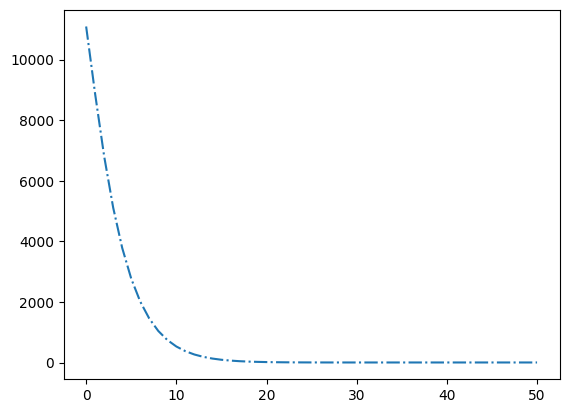

In [49]:
plt.plot(np.concatenate(costs1,axis=0),'-.')

In [61]:
thetas

[array([[0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.04974953],
        [0.04948039],
        [0.04942999],
        [0.04954493]]),
 array([[0.11867669],
        [0.11798902],
        [0.11783474],
        [0.11817632]]),
 array([[0.18881106],
        [0.18770584],
        [0.18744141],
        [0.18802181]]),
 array([[0.25461927],
        [0.2531279 ],
        [0.25275855],
        [0.25356779]]),
 array([[0.314113  ],
        [0.31227609],
        [0.31181117],
        [0.31283223]]),
 array([[0.36678654],
        [0.36464584],
        [0.36409584],
        [0.36531035]]),
 array([[0.41281389],
        [0.41040879],
        [0.40978409],
        [0.41117465]]),
 array([[0.45267755],
        [0.45004376],
        [0.44935404],
        [0.45090512]]),
 array([[0.48698321],
        [0.48415238],
        [0.48340635],
        [0.48510454]]),
 array([[0.51636433],
        [0.51336407],
        [0.51256946],
        [0.51440337]]),
 array([[0.5414333 ],
        [0.53828754]